# Metafísica del PIB
El PIB es un indicador macroeconómico mágico para muchas personas. Es promovido por econometristas descuidados y políticos oportunistas como una representación de la riqueza producida por un país entero. 

La estadística y la econometría son disciplinas de conocimiento bastante interesantes y poderosas. Nos han permitido entender y optimizar todo tipo de procesos. La estadística se usa desde la física y la matemática discreta, hasta la antropología y la psicología. Provee herramientas muy versátiles para construr argumentos consistentes y bien fundamentados. Lamentablemente, hay bastante ignorancia en general sobre estas disciplinas, y pasa mucho que se malinterpreta o se manipula 

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mlp
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
wdi = pd.read_csv("../../DATOS/Worldbank/WDI/WDIData.csv")

In [4]:
wdi.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', 'Unnamed: 63'],
      dtype='object')

In [447]:
def intTry(x): 
    try: 
        int(x)
        return True
    except:
        return False
yearCols = wdi.columns.map(intTry)
wdi.columns[yearCols==True]

Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018'],
      dtype='object')

In [88]:
def intTry(x): 
    try: 
        int(x)
        return True
    except:
        return False
yearCols = wdi.columns.map(intTry)

In [89]:
wdi[wdi["Indicator Code"] == "NY.GDP.MKTP.KD.ZG"]#.loc[:,list(yearCols)]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
211588,Honduras,HND,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.855659,5.764846,3.580437,5.416646,9.037156,...,3.73114,3.835691,4.128688,2.79156,3.058081,3.84008,3.752149,4.785298,NaN,NaN


In [546]:
indicators = [
    "Employment to population ratio, 15+, total (%) (modeled ILO estimate)",
    "GDP growth (annual %)",
    "Mortality rate, infant (per 1,000 live births)",
    "Mortality rate, under-5 (per 1,000 live births)",
    "Intentional homicides (per 100,000 people)",
    "Vulnerable employment, total (% of total employment) (modeled ILO estimate)",
    "Unemployment, total (% of total labor force) (national estimate)",
    "Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)"
]
def getCorrs(country, printoutput = True, startYear = 2010, endYear = 2020):
    temp2 = wdi[ (wdi["Country Code"] == country) & 
                 (wdi["Indicator Name"].isin(indicators))].set_index("Indicator Name")
    temp2 = temp2.loc[:, wdi.columns[yearCols==True]].T
    #temp2 = temp2.loc[temp2.index[temp2.apply(lambda x: all(x.notna()), 1) ]]
    temp2.index = temp2.index.astype(int)
    temp2 = temp2[temp2.index >= startYear].sort_index()
    temp2["homicidesDiff"] = temp2["Intentional homicides (per 100,000 people)"].diff()
    temp2["employmentDiff"] = temp2["Employment to population ratio, 15+, total (%) (modeled ILO estimate)"].diff()
    temp2["vulnerableEDiff"] = temp2["Vulnerable employment, total (% of total employment) (modeled ILO estimate)"].diff()
    temp2["unemployDiff"] = temp2["Unemployment, total (% of total labor force) (national estimate)"].diff()
    temp2["infMortDiff"] = temp2["Mortality rate, infant (per 1,000 live births)"].diff()
    temp2["under5MortDiff"] = temp2["Mortality rate, under-5 (per 1,000 live births)"].diff()
    temp2["povhcDiff"] = temp2["Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)"].diff()
    corrs = temp2.corr()
    for col in corrs.columns:
        for col2 in corrs.columns:
            if col == col2:
                break;
            corrs.loc[col, col2] = temp2[[col,col2]].apply(lambda x: all(x.notna()), 1).sum()
    return temp2, corrs

In [465]:
t, c = getCorrs("USA")
print(c.loc[
            ["GDP growth (annual %)"],
            ["homicidesDiff", "vulnerableEDiff", "unemployDiff", "employmentDiff", "infMortDiff", "under5MortDiff", "lowIncomeDiff"]])
print(c.loc[["homicidesDiff", "vulnerableEDiff", "unemployDiff", "employmentDiff", "infMortDiff", "under5MortDiff", "lowIncomeDiff"],
           ["GDP growth (annual %)"]])
t

Indicator Name         homicidesDiff  vulnerableEDiff  unemployDiff  \
Indicator Name                                                        
GDP growth (annual %)       0.303082         0.464649     -0.669356   

Indicator Name         employmentDiff  infMortDiff  under5MortDiff  \
Indicator Name                                                       
GDP growth (annual %)        0.478069     0.195098       -0.631443   

Indicator Name         lowIncomeDiff  
Indicator Name                        
GDP growth (annual %)            NaN  
Indicator Name   GDP growth (annual %)
Indicator Name                        
homicidesDiff                      6.0
vulnerableEDiff                    7.0
unemployDiff                       7.0
employmentDiff                     7.0
infMortDiff                        7.0
under5MortDiff                     7.0
lowIncomeDiff                      0.0


Indicator Name,"Employment to population ratio, 15+, total (%) (modeled ILO estimate)",GDP growth (annual %),Income share held by lowest 20%,"Intentional homicides (per 100,000 people)","Mortality rate, infant (per 1,000 live births)","Mortality rate, under-5 (per 1,000 live births)",Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),"Unemployment, total (% of total labor force) (national estimate)","Vulnerable employment, total (% of total employment) (modeled ILO estimate)",homicidesDiff,employmentDiff,vulnerableEDiff,unemployDiff,infMortDiff,under5MortDiff,povhcDiff,lowIncomeDiff
2010,57.462002,2.531921,5.1,4.769937,6.2,7.3,1.0,9.6334,6.787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,57.375999,1.601455,NaN,4.713369,6.1,7.2,NaN,8.9492,6.586,-0.056568,-0.086002,-0.201,-0.6842,-0.1,-0.1,NaN,NaN
2012,57.821999,2.224031,NaN,4.741245,6.1,7.1,NaN,8.0694,6.531,0.027876,0.445999,-0.055,-0.8798,0.0,-0.1,NaN,NaN
2013,57.903000,1.677332,5.1,4.537983,6.0,7.0,1.0,7.3749,6.381,-0.203262,0.081001,-0.150,-0.6945,-0.1,-0.1,NaN,NaN
2014,58.369999,2.569194,NaN,4.458030,5.9,6.9,NaN,6.1675,6.237,-0.079952,0.466999,-0.144,-1.2074,-0.1,-0.1,NaN,NaN
2015,58.740002,2.861587,NaN,4.964536,5.8,6.8,NaN,5.2800,6.238,0.506506,0.370003,0.001,-0.8875,-0.1,-0.1,NaN,NaN
2016,59.132999,1.485279,5.0,5.353325,5.7,6.7,1.2,4.8692,6.187,0.388789,0.392998,-0.051,-0.4108,-0.1,-0.1,NaN,NaN
2017,59.192001,2.273339,NaN,NaN,5.7,6.6,NaN,4.3552,6.081,NaN,0.059002,-0.106,-0.5140,0.0,-0.1,NaN,NaN
2018,59.134998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.059,NaN,-0.057003,-0.022,NaN,NaN,NaN,NaN,NaN


## EEUU
El crecimiento del PIB en los EEUU sí está asociado medianamente al crecimiento del empleo y la disminución del desempleo, aunque aumenta el empleo vulnerable. Está asociado al aumento de la tasa de homicidios.

In [548]:
t, c = getCorrs("GTM")
print(c.loc[
            ["GDP growth (annual %)"],
            ["homicidesDiff", "vulnerableEDiff", "unemployDiff", "employmentDiff", "infMortDiff", "under5MortDiff", "povhcDiff"]])
print(c.loc[["homicidesDiff", "vulnerableEDiff", "unemployDiff", "employmentDiff", "infMortDiff", "under5MortDiff", "povhcDiff"],
           ["GDP growth (annual %)"]])

Indicator Name         homicidesDiff  vulnerableEDiff  unemployDiff  \
Indicator Name                                                        
GDP growth (annual %)       0.337996        -0.585314      0.440891   

Indicator Name         employmentDiff  infMortDiff  under5MortDiff  povhcDiff  
Indicator Name                                                                 
GDP growth (annual %)       -0.390518     0.165705       -0.316294        NaN  
Indicator Name   GDP growth (annual %)
Indicator Name                        
homicidesDiff                      6.0
vulnerableEDiff                    7.0
unemployDiff                       6.0
employmentDiff                     7.0
infMortDiff                        7.0
under5MortDiff                     7.0
povhcDiff                          0.0


## Guatemala
En Guatemala, el crecimiento del PIB está asociado al aumento del desempleo, y la disminución del empleo y de los empleos vulnerables. Hy tambien una pequeña relación con el aumento en la tasa de homicidios y con la disminución de la mortalidad de niños menores a 5 años.

In [471]:
t,c = getCorrs("SLV")
print(c.loc[
            ["GDP growth (annual %)"],
            ["homicidesDiff", "vulnerableEDiff", "unemployDiff", "employmentDiff", "infMortDiff", "under5MortDiff", "povhcDiff"]])
print(c.loc[["homicidesDiff", "vulnerableEDiff", "unemployDiff", "employmentDiff", "infMortDiff", "under5MortDiff", "povhcDiff"],
           ["GDP growth (annual %)"]])
t

Indicator Name         homicidesDiff  vulnerableEDiff  unemployDiff  \
Indicator Name                                                        
GDP growth (annual %)      -0.265391         0.472206     -0.726289   

Indicator Name         employmentDiff  infMortDiff  under5MortDiff  povhcDiff  
Indicator Name                                                                 
GDP growth (annual %)        0.615293    -0.725146       -0.726772  -0.317272  
Indicator Name   GDP growth (annual %)
Indicator Name                        
homicidesDiff                      6.0
vulnerableEDiff                    7.0
unemployDiff                       7.0
employmentDiff                     7.0
infMortDiff                        7.0
under5MortDiff                     7.0
povhcDiff                          6.0


Indicator Name,"Employment to population ratio, 15+, total (%) (modeled ILO estimate)",GDP growth (annual %),Income share held by lowest 20%,"Intentional homicides (per 100,000 people)","Mortality rate, infant (per 1,000 live births)","Mortality rate, under-5 (per 1,000 live births)",Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),"Unemployment, total (% of total labor force) (national estimate)","Vulnerable employment, total (% of total employment) (modeled ILO estimate)",homicidesDiff,employmentDiff,vulnerableEDiff,unemployDiff,infMortDiff,under5MortDiff,povhcDiff,lowIncomeDiff
2010,58.307999,2.106213,5.1,64.675456,16.6,19.4,5.5,4.8932,37.573999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,58.916000,3.811815,5.6,70.584702,15.8,18.4,4.5,4.3019,37.952000,5.909245,0.608002,0.378001,-0.5913,-0.8,-1.0,-1.0,0.5
2012,59.449001,2.814075,5.7,41.695827,15.1,17.6,4.1,3.8463,37.541001,-28.888874,0.533001,-0.410999,-0.4556,-0.7,-0.8,-0.4,0.1
2013,59.903999,2.375194,5.5,40.203002,14.5,16.9,3.2,3.6926,37.625000,-1.492826,0.454998,0.083999,-0.1537,-0.6,-0.7,-0.9,-0.2
2014,59.227001,1.979257,5.8,62.424487,13.9,16.2,3.0,4.1631,35.398999,22.221485,-0.676998,-2.226001,0.4705,-0.6,-0.7,-0.2,0.3
2015,58.962002,2.377629,6.1,105.441952,13.4,15.5,1.9,3.9999,36.091000,43.017465,-0.264999,0.692001,-0.1632,-0.5,-0.7,-1.1,0.3
2016,58.405998,2.580577,5.9,82.842257,12.9,15.0,2.2,4.4183,35.969000,-22.599694,-0.556004,-0.122000,0.4184,-0.5,-0.5,0.3,-0.2
2017,58.645000,2.322597,NaN,NaN,12.5,14.5,NaN,4.3850,36.008999,NaN,0.239002,0.039999,-0.0333,-0.4,-0.5,NaN,NaN
2018,58.910000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.828999,NaN,0.264999,-0.180000,NaN,NaN,NaN,NaN,NaN


## El Salvador
El Salvador tiene un comportamiento ideal, el crecimiento del PIB está relacionado con la mejora del país.en varios aspectos.

In [474]:
t,c = getCorrs("HND")
print(c.loc[
            ["GDP growth (annual %)"],
            ["homicidesDiff", "vulnerableEDiff", "unemployDiff", "employmentDiff", "infMortDiff", "under5MortDiff", "povhcDiff"]])
print(c.loc[["homicidesDiff", "vulnerableEDiff", "unemployDiff", "employmentDiff", "infMortDiff", "under5MortDiff", "povhcDiff"],
           ["GDP growth (annual %)"]])
t

Indicator Name         homicidesDiff  vulnerableEDiff  unemployDiff  \
Indicator Name                                                        
GDP growth (annual %)       0.573242         0.321143     -0.705391   

Indicator Name         employmentDiff  infMortDiff  under5MortDiff  povhcDiff  
Indicator Name                                                                 
GDP growth (annual %)        -0.44603     0.030697        0.255176   0.915544  
Indicator Name   GDP growth (annual %)
Indicator Name                        
homicidesDiff                      6.0
vulnerableEDiff                    7.0
unemployDiff                       7.0
employmentDiff                     7.0
infMortDiff                        7.0
under5MortDiff                     7.0
povhcDiff                          6.0


Indicator Name,"Employment to population ratio, 15+, total (%) (modeled ILO estimate)",GDP growth (annual %),Income share held by lowest 20%,"Intentional homicides (per 100,000 people)","Mortality rate, infant (per 1,000 live births)","Mortality rate, under-5 (per 1,000 live births)",Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),"Unemployment, total (% of total labor force) (national estimate)","Vulnerable employment, total (% of total employment) (modeled ILO estimate)",homicidesDiff,employmentDiff,vulnerableEDiff,unemployDiff,infMortDiff,under5MortDiff,povhcDiff,lowIncomeDiff
2010,61.676998,3.731140,3.1,76.097241,20.1,23.7,15.0,4.1187,53.214998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,60.035999,3.835691,2.7,85.061545,19.3,22.7,17.1,4.4745,45.183001,8.964304,-1.640999,-8.031998,0.3558,-0.8,-1.0,2.1,-0.4
2012,59.030998,4.128688,2.8,84.320462,18.6,21.9,19.6,3.7545,45.119998,-0.741083,-1.005001,-0.063003,-0.7200,-0.7,-0.8,2.5,0.1
2013,60.897999,2.791560,3.2,74.279969,18.0,21.0,17.3,4.0960,42.627001,-10.040493,1.867001,-2.492997,0.3415,-0.6,-0.9,-2.3,0.4
2014,62.036999,3.058081,3.6,66.873147,17.3,20.3,15.9,5.4879,38.643000,-7.406821,1.139000,-3.984001,1.3919,-0.7,-0.7,-1.4,0.4
2015,64.738998,3.840080,3.6,57.450042,16.7,19.6,16.2,4.5916,41.751001,-9.423106,2.702000,3.108002,-0.8963,-0.6,-0.7,0.3,0.0
2016,64.948997,3.752149,3.2,56.515703,16.2,18.9,16.0,4.6682,37.182000,-0.934339,0.209999,-4.569001,0.0766,-0.5,-0.7,-0.2,-0.4
2017,65.045998,4.785298,NaN,NaN,15.6,18.2,NaN,4.0480,37.289999,NaN,0.097000,0.107999,-0.6202,-0.6,-0.7,NaN,NaN
2018,65.091003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.003000,NaN,0.045006,-0.286999,NaN,NaN,NaN,NaN,NaN


## Honduras
Hay relaciones negativas entre el crecimiento del PIB y varios factores. El desempleo baja,c on el crecimiento del PIB, pero el empleo también, los homicidios aumentan, la mortalidad infantil aumenta, y la pobreza también aumenta.

In [497]:
def getCorrelation(country, startYear, endYear, x, y, xdiff= False, ydiff = False):
    temp2 = wdi[ (wdi["Country Code"] == country) & 
                 (wdi["Indicator Name"].isin([x, y]))].set_index("Indicator Name")
    temp2 = temp2.loc[:, wdi.columns[yearCols==True]].T
    temp2.index = temp2.index.astype(int)
    temp2 = temp2[(temp2.index >= startYear) & (temp2.index < endYear) ].sort_index()
    if (xdiff):
        temp2[x] = temp2[x].diff()
    if (ydiff):
        temp2[y] = temp2[y].diff()
    
    corr = temp2.corr().values[0][1]
    n    = temp2[[x, y]].apply(lambda x: all(x.notna()), 1).sum()
    return corr, n

# Correlaciones con el PIB para los años 2010 - 2017

In [528]:
corrsData = pd.DataFrame(columns=["c", "n", "x", "y", "country", "decade"])

In [554]:
countries = wdi["Country Code"].unique()
indicators = [    
    "Employment to population ratio, 15+, total (%) (modeled ILO estimate)",
    "Mortality rate, infant (per 1,000 live births)",
    "Mortality rate, under-5 (per 1,000 live births)",
    "Vulnerable employment, total (% of total employment) (modeled ILO estimate)",
    "Unemployment, total (% of total labor force) (national estimate)",
    "Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)",
    "Intentional homicides (per 100,000 people)"
]

In [530]:
years = [ [2000, 2010], [2010, 2017] ]
countries = wdi["Country Code"].unique()
for i in indicators:
    print(i)
    for y in years:
        dstring = str(y[0])+"-"+str(y[1])
        print(dstring)
        for x in countries:
            temp = getCorrelation(x, y[0], y[1], "GDP growth (annual %)", i, ydiff= True)
            corrsData.loc[len(corrsData)] = pd.Series({
                "country": x,
                "c": temp[0],
                "n": temp[1],
                "x": "GDP",
                "y": i,
                "decade": dstring
            })

Employment to population ratio, 15+, total (%) (modeled ILO estimate)
2000-2010
2010-2017
Mortality rate, infant (per 1,000 live births)
2000-2010
2010-2017
Mortality rate, under-5 (per 1,000 live births)
2000-2010
2010-2017
Vulnerable employment, total (% of total employment) (modeled ILO estimate)
2000-2010
2010-2017
Unemployment, total (% of total labor force) (national estimate)
2000-2010
2010-2017
Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)
2000-2010
2010-2017
Intentional homicides (per 100,000 people)
2000-2010
2010-2017


In [531]:
corrsData.to_csv("correlations_pib_indicators.csv")

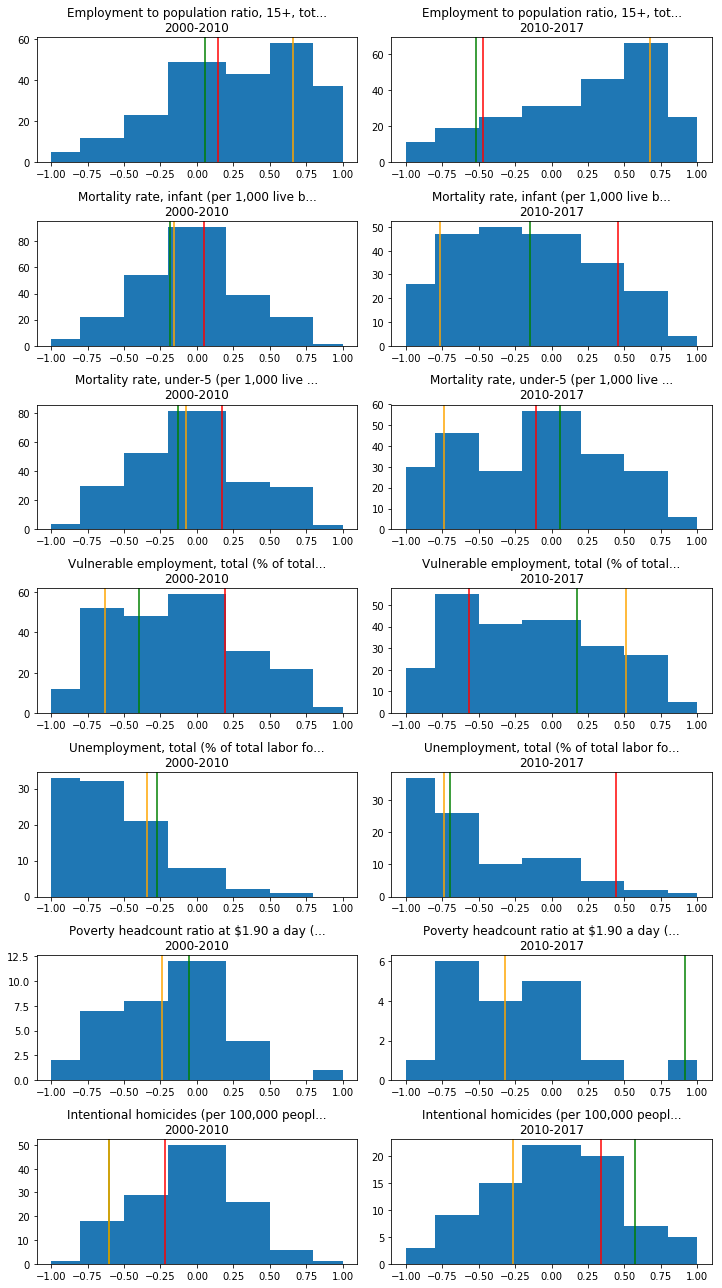

In [556]:
mlp.rcParams["figure.figsize"] = (10, 18)
for j, indicator in enumerate(indicators):
    for i, y in enumerate([ "2000-2010", "2010-2017"]):
        plt.subplot(len(indicators),2, j*2 + i+1)
        plt.hist(corrsData[(corrsData.n >= 6) & (corrsData.decade == y) &
                        (corrsData.y == indicator)].c, 
                 bins=[-1,-0.8,-0.5,-0.2,0.2,0.5,0.8,1], range=[-1,1])
        gtmval = corrsData[(corrsData.n >= 6) & (corrsData.decade == y) &
                        (corrsData.y == indicator) & (corrsData.country == "GTM")].c.values
        if len(gtmval):
            plt.axvline(gtmval[0], color = "red")
        
        val = corrsData[(corrsData.n >= 6) & (corrsData.decade == y) &
                        (corrsData.y == indicator) & (corrsData.country == "HND")].c.values
        if len(val):
            plt.axvline(val[0], color = "green")
            
        val = corrsData[(corrsData.n >= 6) & (corrsData.decade == y) &
                        (corrsData.y == indicator) & (corrsData.country == "SLV")].c.values
        if len(val):
            plt.axvline(val[0], color = "orange")
            
        plt.title(indicator[0:40] + "...\n" + y)
plt.tight_layout()

In [ ]:
corrsData2 = pd.DataFrame(columns=["c", "n", "x", "y", "country", "decade"])
indicators2 = [    
    "Employment to population ratio, 15+, total (%) (modeled ILO estimate)",
    "Vulnerable employment, total (% of total employment) (modeled ILO estimate)",
    "Unemployment, total (% of total labor force) (national estimate)",
    "Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)",
    "Intentional homicides (per 100,000 people)"
]

In [557]:
#indicators2 = [
#    ""
#]
years = [ [2000, 2010], [2010, 2017] ]
countries = wdi["Country Code"].unique()
for i in indicators2:
    print(i)
    for y in years:
        dstring = str(y[0])+"-"+str(y[1])
        print(dstring)
        for x in countries:
            temp = getCorrelation(x, y[0], y[1], "GDP per capita growth (annual %)", i, ydiff= True)
            corrsData2.loc[len(corrsData2)] = pd.Series({
                "country": x,
                "c": temp[0],
                "n": temp[1],
                "x": "GDP",
                "y": i,
                "decade": dstring
            })

Employment to population ratio, 15+, total (%) (modeled ILO estimate)
2000-2010
2010-2017
Vulnerable employment, total (% of total employment) (modeled ILO estimate)
2000-2010
2010-2017
Unemployment, total (% of total labor force) (national estimate)
2000-2010
2010-2017
Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)
2000-2010
2010-2017
Intentional homicides (per 100,000 people)
2000-2010
2010-2017


In [596]:
corrsData2.to_csv("./correlations_pibpc_indicators.csv")

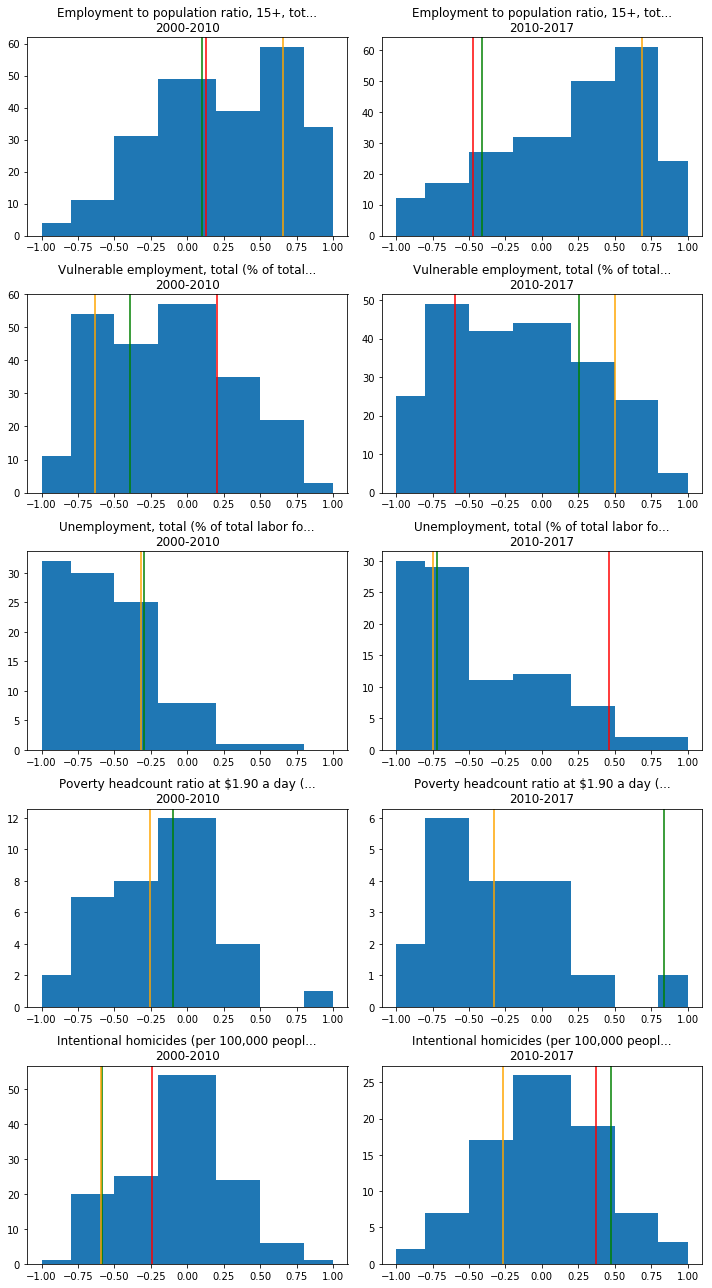

In [558]:
mlp.rcParams["figure.figsize"] = (10, 18)
for j, indicator in enumerate(indicators2):
    for i, y in enumerate([ "2000-2010", "2010-2017"]):
        plt.subplot(len(indicators2),2, j*2 + i+1)
        plt.hist(corrsData2[(corrsData2.n >= 6) & (corrsData2.decade == y) &
                        (corrsData2.y == indicator)].c, 
                 bins=[-1,-0.8,-0.5,-0.2,0.2,0.5,0.8,1], range=[-1,1])
        gtmval = corrsData2[(corrsData2.n >= 6) & (corrsData2.decade == y) &
                        (corrsData2.y == indicator) & (corrsData2.country == "GTM")].c.values
        if len(gtmval):
            plt.axvline(gtmval[0], color = "red")
        
        val = corrsData2[(corrsData2.n >= 6) & (corrsData2.decade == y) &
                        (corrsData2.y == indicator) & (corrsData2.country == "HND")].c.values
        if len(val):
            plt.axvline(val[0], color = "green")
            
        val = corrsData2[(corrsData2.n >= 6) & (corrsData2.decade == y) &
                        (corrsData2.y == indicator) & (corrsData2.country == "SLV")].c.values
        if len(val):
            plt.axvline(val[0], color = "orange")
            
        plt.title(indicator[0:40] + "...\n" + y)
plt.tight_layout()

In [595]:
getCorrelation("USA", 2010, 2020, 
               "Expense (% of GDP)", "Intentional homicides (per 100,000 people)",
                  )

(-0.2110436488851012, 7)

In [589]:
wdi[(wdi["Country Code"] == "GTM") & 
    (wdi["Indicator Name"] == "Expense (% of GDP)")].T.tail(20)

,203508
2000,10.94
2001,13.186
2002,12.774
2003,14.3461
2004,12.6701
2005,12.8344
2006,13.0117
2007,12.4573
2008,11.6823
2009,12.4184


In [435]:
list(filter(lambda x: (x[1]<-0.4) , zip(data.keys(), eds)))

[('AUS', -0.5842992771271558),
 ('AUT', -0.8898205045588432),
 ('CZE', -0.4578198153843149),
 ('ECU', -0.6149586896146706),
 ('FIN', -0.41118654209622296),
 ('GRC', -0.8429308256126237),
 ('GTM', -0.5657417418041937),
 ('ISL', -0.686830159373411),
 ('IDN', -0.6949411793138472),
 ('IRL', -0.40415344225033634),
 ('JAM', -0.8870419192785314),
 ('MEX', -0.4246367697128624),
 ('NLD', -0.43830991190916857),
 ('PAN', -0.5791722898101868),
 ('PRT', -0.5495272355941831),
 ('ROU', -0.5034626257688947),
 ('ZAF', -0.4784868309913138),
 ('ESP', -0.9106258791999773),
 ('LKA', -0.49428769838824976),
 ('URY', -0.865525258107849)]

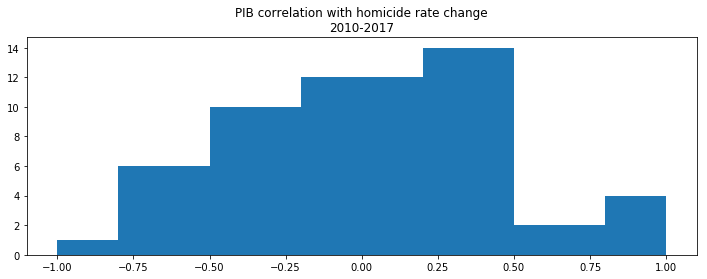

In [436]:
eds = list(map(lambda x: x[1]["homicidesDiff"]["GDP growth (annual %)"] \
               if (x[1]["GDP growth (annual %)"]["homicidesDiff"] > 5) 
               #& (x[0]["Employment to population ratio, 15+, total (%) (modeled ILO estimate)"].min() <65 ) \
               else np.NaN, data.values()))
plt.hist(eds, bins=[-1,-0.8,-0.5,-0.2,0.2,0.5,0.8,1], range=[-1,1])
plt.title("PIB correlation with homicide rate change\n2010-2017")
None

In [438]:
list(filter(lambda x: (x[1]>0.2) , zip(data.keys(), eds)))

[('AUT', 0.8104823230394623),
 ('COL', 0.22921036753156934),
 ('HRV', 0.4745255783850962),
 ('FRA', 0.2864772137982034),
 ('GTM', 0.3379963359937857),
 ('HND', 0.5732415189382818),
 ('HUN', 0.42814504652250396),
 ('IDN', 0.4585995452763881),
 ('JOR', 0.48488136425027417),
 ('MEX', 0.4619399246099488),
 ('MNG', 0.24551871641425518),
 ('MNE', 0.20495195470424746),
 ('PAN', 0.9037448846746186),
 ('POL', 0.972771241372478),
 ('SRB', 0.9120264394360551),
 ('ESP', 0.4418763676555463),
 ('SWE', 0.44491628148985607),
 ('THA', 0.7792654120862993),
 ('GBR', 0.261113147513884),
 ('USA', 0.30308174065697896)]

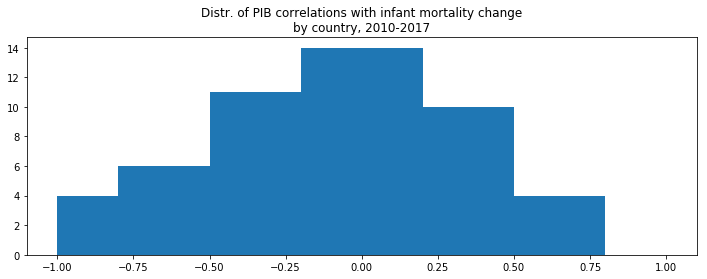

In [414]:
eds = list(map(lambda x: x[1]["infMortDiff"]["GDP growth (annual %)"] \
               if (x[1]["GDP growth (annual %)"]["infMortDiff"] > 5) 
               #& (x[0]["Employment to population ratio, 15+, total (%) (modeled ILO estimate)"].min() <65 ) \
               else np.NaN, data.values()))
plt.hist(eds, bins=[-1,-0.8,-0.5,-0.2,0.2,0.5,0.8,1], range=[-1,1])
plt.title("Distr. of PIB correlations with infant mortality change\nby country, 2010-2017")
None

# Correlaciones con el PIB para los años 2000 - 2010

In [484]:
data = {}
for x in wdi["Country Code"].unique():
    data[x] = getCorrs(x, False, startYear = 2000, endYear = 2010)

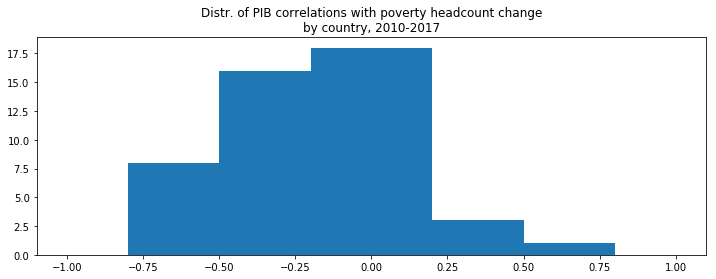

In [485]:
eds = list(map(lambda x: x[1]["povhcDiff"]["GDP growth (annual %)"] \
               if (x[1]["GDP growth (annual %)"]["povhcDiff"] > 8) 
               #& (x[0]["Employment to population ratio, 15+, total (%) (modeled ILO estimate)"].min() <65 ) \
               else np.NaN, data.values()))
plt.hist(eds, bins=[-1,-0.8,-0.5,-0.2,0.2,0.5,0.8,1], range=[-1,1])
plt.title("Distr. of PIB correlations with poverty headcount change\nby country, 2010-2017")
None

In [478]:
list(filter(lambda x: (x[1]>0.2), zip(data.keys(), eds)))

[('HND', 0.9155442140416492), ('URY', 0.24524356750710552)]

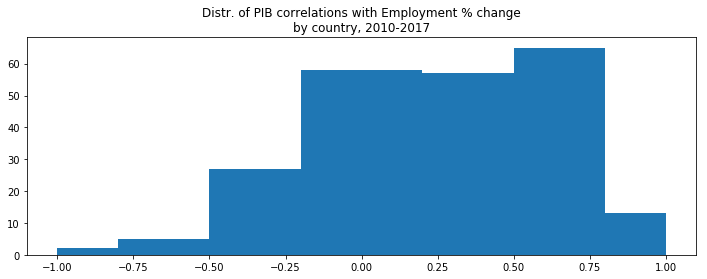

In [486]:
eds = list(map(lambda x: x[1]["employmentDiff"]["GDP growth (annual %)"] \
               if (x[1]["GDP growth (annual %)"]["employmentDiff"] > 5) 
               #& (x[0]["Employment to population ratio, 15+, total (%) (modeled ILO estimate)"].min() <65 ) \
               else np.NaN, data.values()))
plt.hist(eds, bins=[-1,-0.8,-0.5,-0.2,0.2,0.5,0.8,1], range=[-1,1])
plt.title("Distr. of PIB correlations with Employment % change\nby country, 2010-2017")
None

In [487]:
list(filter(lambda x: (x[1]<-0.3), zip(data.keys(), eds)))

[('LIC', -0.3054002642480389),
 ('ARM', -0.3460369851169468),
 ('BDI', -0.5963276969566135),
 ('CPV', -0.4336050320983944),
 ('COD', -0.35012178715207776),
 ('GNQ', -0.4306737150152332),
 ('ETH', -0.43588141783834206),
 ('LBY', -0.5326014595777102),
 ('MRT', -0.3885627884216934),
 ('MMR', -0.7818712529944872),
 ('PNG', -0.349475776985212),
 ('PRY', -0.4037571892479347),
 ('SLB', -0.9857187639940784),
 ('SYR', -0.7214471712331566),
 ('TLS', -0.47984759734704274),
 ('TGO', -0.31391470623829953),
 ('TON', -0.4615919981286363),
 ('UGA', -0.4211118077812914),
 ('VUT', -0.9007580218927707),
 ('VNM', -0.42053534872140913),
 ('YEM', -0.6430725443452233),
 ('ZMB', -0.4518242896916372),
 ('ZWE', -0.4462351198551906)]

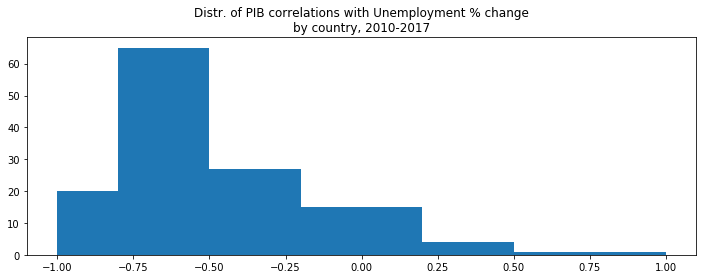

In [488]:
eds = list(map(lambda x: x[1]["unemployDiff"]["GDP growth (annual %)"] \
               if (x[1]["GDP growth (annual %)"]["unemployDiff"] > 5) 
               #& (x[0]["Employment to population ratio, 15+, total (%) (modeled ILO estimate)"].min() <65 ) \
               else np.NaN, data.values()))
plt.hist(eds, bins=[-1,-0.8,-0.5,-0.2,0.2,0.5,0.8,1], range=[-1,1], )
plt.title("Distr. of PIB correlations with Unemployment % change\nby country, 2010-2017")
None

In [489]:
list(filter(lambda x: (x[1]>0.3) , zip(data.keys(), eds)))

[('BLZ', 0.33268734687466434),
 ('GTM', 0.3408232546244043),
 ('CHE', 0.6400153991251796),
 ('YEM', 0.8937896099057717)]

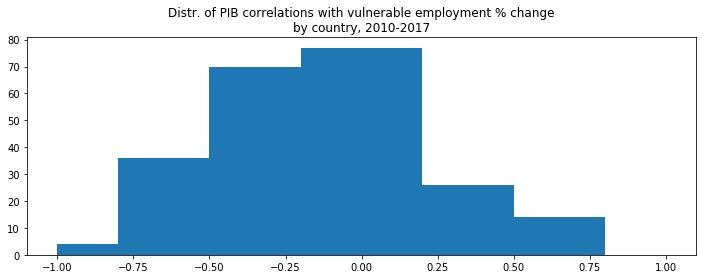

In [490]:
eds = list(map(lambda x: x[1]["vulnerableEDiff"]["GDP growth (annual %)"] \
               if (x[1]["GDP growth (annual %)"]["vulnerableEDiff"] > 5) 
               #& (x[0]["Employment to population ratio, 15+, total (%) (modeled ILO estimate)"].min() <65 ) \
               else np.NaN, data.values()))
plt.hist(eds, bins=[-1,-0.8,-0.5,-0.2,0.2,0.5,0.8,1], range=[-1,1])
plt.title("Distr. of PIB correlations with vulnerable employment % change\nby country, 2010-2017")
None

In [495]:
list(filter(lambda x: (x[0]== "GTM") , zip(data.keys(), eds)))

[('GTM', 0.08229279379514932)]

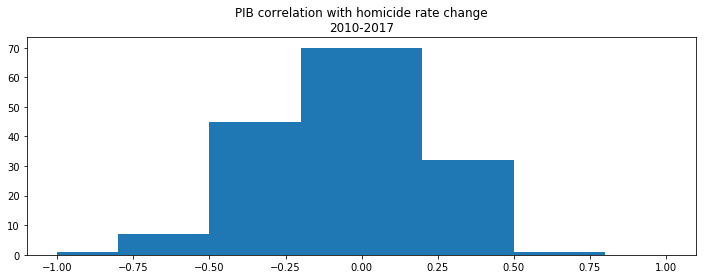

In [492]:
eds = list(map(lambda x: x[1]["homicidesDiff"]["GDP growth (annual %)"] \
               if (x[1]["GDP growth (annual %)"]["homicidesDiff"] > 5) 
               #& (x[0]["Employment to population ratio, 15+, total (%) (modeled ILO estimate)"].min() <65 ) \
               else np.NaN, data.values()))
plt.hist(eds, bins=[-1,-0.8,-0.5,-0.2,0.2,0.5,0.8,1], range=[-1,1])
plt.title("PIB correlation with homicide rate change\n2010-2017")
None

In [493]:
list(filter(lambda x: (x[1]>0.2) , zip(data.keys(), eds)))

[('ALB', 0.24059828971989705),
 ('ATG', 0.5981110850393963),
 ('AUT', 0.2939763229247859),
 ('BRB', 0.21310094702980298),
 ('BMU', 0.4910870734501288),
 ('BTN', 0.20080580588564315),
 ('BFA', 0.31555956760010306),
 ('BDI', 0.23814961993293327),
 ('FIN', 0.30425465754479436),
 ('FRA', 0.4444856444869282),
 ('GEO', 0.41361993725768154),
 ('GHA', 0.21569178262114808),
 ('GRD', 0.24552753730088553),
 ('HUN', 0.24924873445888146),
 ('IDN', 0.21230192650477842),
 ('JPN', 0.3146443198346729),
 ('JOR', 0.329017066814614),
 ('LTU', 0.29043799723263464),
 ('LUX', 0.38980604986803263),
 ('MYS', 0.25141682475285226),
 ('MUS', 0.3491537604132326),
 ('MAR', 0.47583904179370995),
 ('PAN', 0.2391610502419881),
 ('POL', 0.49183830385645183),
 ('ROU', 0.297220397116459),
 ('LKA', 0.3523451410968749),
 ('TZA', 0.33603809283015856),
 ('TLS', 0.31461127393027793),
 ('TON', 0.42393686495565674),
 ('TTO', 0.32715337719837334),
 ('TKM', 0.44062309400989796),
 ('UZB', 0.20503073850015296),
 ('ZMB', 0.389889908

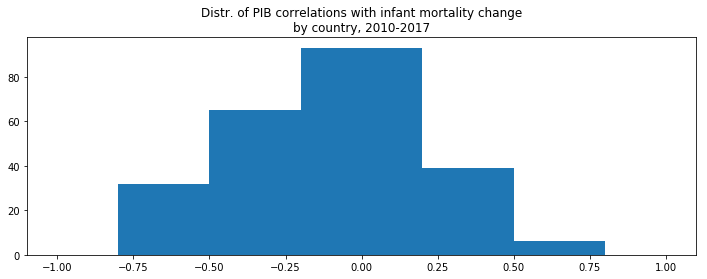

In [494]:
eds = list(map(lambda x: x[1]["infMortDiff"]["GDP growth (annual %)"] \
               if (x[1]["GDP growth (annual %)"]["infMortDiff"] > 5) 
               #& (x[0]["Employment to population ratio, 15+, total (%) (modeled ILO estimate)"].min() <65 ) \
               else np.NaN, data.values()))
plt.hist(eds, bins=[-1,-0.8,-0.5,-0.2,0.2,0.5,0.8,1], range=[-1,1])
plt.title("Distr. of PIB correlations with infant mortality change\nby country, 2010-2017")
None